# Data Dictionary

The data has the following fields:

|Column name | Description |
|------------|-------------|
| `loan_id`  | Unique loan id |
| `gender`   | Gender - `Male` / `Female` |
| `married`  | Marital status - `Yes` / `No` |
| `dependents` | Number of dependents |
| `education` | Education - `Graduate` / `Not Graduate` |
| `self_employed` | Self-employment status - `Yes` / `No` |
| `applicant_income` | Applicant's income |
| `coapplicant_income` | Coapplicant's income |
| `loan_amount` | Loan amount (thousands) |
| `loan_amount_term` | Term of loan (months) |
| `credit_history` | Credit history meets guidelines - `1` / `0` |
| `property_area` | Area of the property - `Urban` / `Semi Urban` / `Rural` |
| `loan_status` | Loan approval status (target) - `1` / `0` |

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#####🔌 SQL Datenbank erstellen und Tables befüllen

In [ ]:
# CSV Encoding
def read_csv_with_encoding(path):
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding='ISO-8859-1')

# Verbindung zur SQL-Datenbank
engine = create_engine('sqlite:///sales_data.db')
connection = engine.connect().execution_options(isolation_level="AUTOCOMMITT")

# CSV-Datei laden
df_loans_modified = read_csv_with_encoding('/content/sample_data/loans_modified.csv')


# In SQL-Tabelle schreiben
df_loans_modified.to_sql('loans_modified', engine, if_exists='replace', index=False)

563

#####✅ Datenbank testen

In [ ]:
# Vorschau-Abfragen
print("loans_modified:")
display(pd.read_sql("SELECT  * FROM loans_modified", engine))

loans_modified:


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Yes,0,Graduate,None,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP001765,Male,Yes,1,Graduate,No,2491.0,2054.0,104.0,360.0,1.0,Semiurban,NaN
559,None,None,Yes,0,Graduate,No,2483.0,2466.0,90.0,180.0,0.0,Rural,1.0
560,LP001977,Male,Yes,1,Graduate,No,1625.0,1803.0,96.0,360.0,1.0,Urban,1.0
561,None,Male,Yes,1,Graduate,No,NaN,1843.0,123.0,NaN,1.0,Semiurban,1.0


#### 🛢️ SQL-Queries

In [ ]:
display(pd.read_sql("""
SELECT  *
FROM loans_modified
where loan_id IS NOT NULL OR gender IS NOT NULL
""", engine))

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Yes,0,Graduate,None,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP001819,Male,Yes,1,Not Graduate,No,6608.0,0.0,137.0,180.0,1.0,Urban,1.0
556,LP001765,Male,Yes,1,Graduate,No,2491.0,2054.0,104.0,360.0,1.0,Semiurban,NaN
557,LP001977,Male,Yes,1,Graduate,No,1625.0,1803.0,96.0,360.0,1.0,Urban,1.0
558,None,Male,Yes,1,Graduate,No,NaN,1843.0,123.0,NaN,1.0,Semiurban,1.0


In [ ]:
# Read in the dataset
loans = pd.read_csv("/content/sample_data/loans_modified.csv")

# Preview the data
loans.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Yes,0,Graduate,NaN,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0




## Cleanliness


Example solution for SQL cleanup (not comprehensive):

DELETE FROM loans_modified
WHERE loan_amount IS NULL OR credit_history IS NULL;

In [ ]:
# Remove the loan_id to avoid accidentally using it as a feature
loans.drop(columns=["loan_id"], inplace=True)

In [ ]:
# Remove duplicate rows
loans.drop_duplicates(inplace=True)
# Remove rows with missing values
loans.dropna(inplace=True)

# Feature Engineering

In [ ]:
# Convert categorical features to boolean
loans = pd.get_dummies(loans)

# Previewing the new DataFrame
loans.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583.0,1508.0,128.0,360.0,1.0,0.0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,2583.0,2358.0,120.0,360.0,1.0,1.0,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
3,6000.0,0.0,141.0,360.0,1.0,1.0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
4,5417.0,4196.0,267.0,360.0,1.0,1.0,False,True,False,True,...,False,True,False,True,False,False,True,False,False,True
5,2333.0,1516.0,95.0,360.0,1.0,1.0,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True


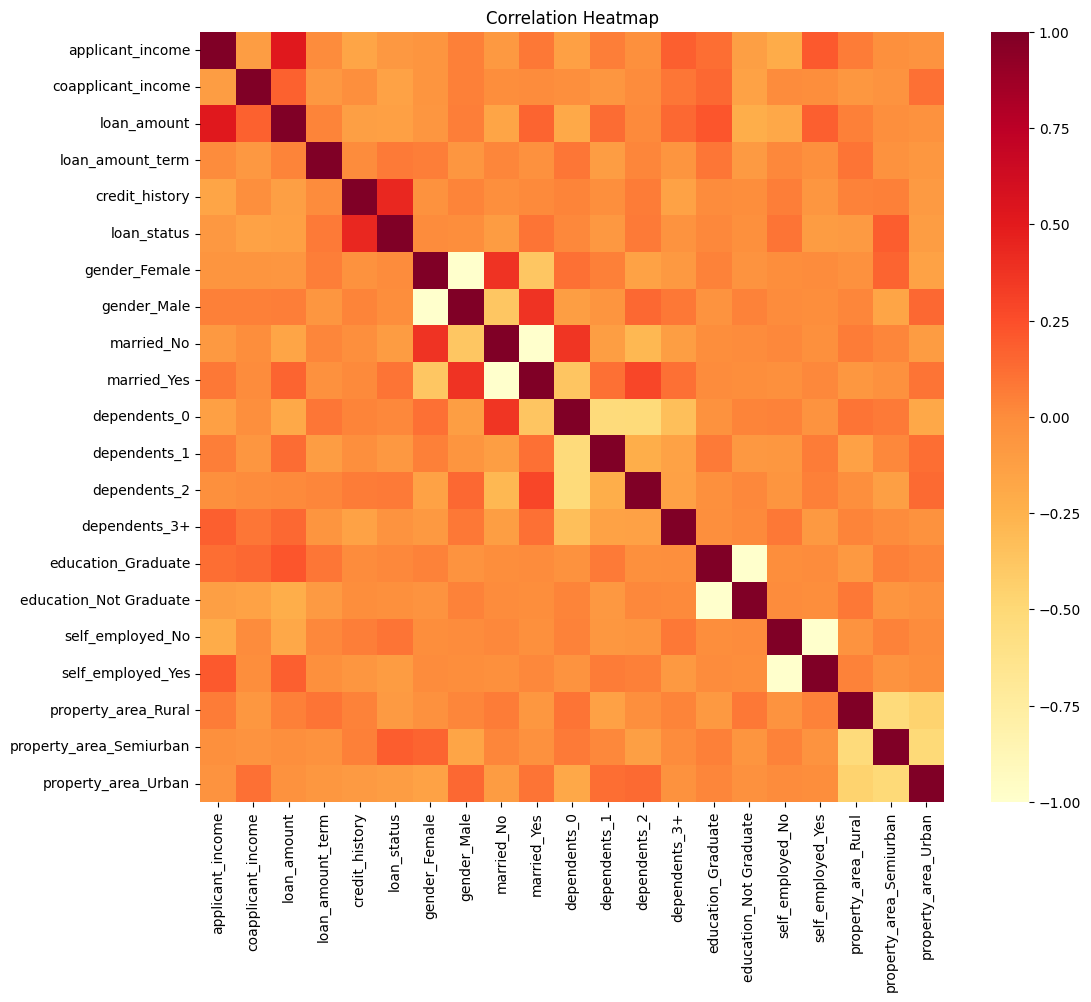

In [ ]:
# Calculate the correlation matrix
corr_matrix = loans.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,  cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Resplit into features and targets
X = loans.drop(columns=["loan_status"])
y = loans["loan_status"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Instantiate decision tree model
clf = DecisionTreeClassifier(random_state=42, max_depth= 3)
# Fit to the training data
clf.fit(X_train, y_train)

# Predict test set values
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy
print(clf.score(X_test, y_test))

0.8045977011494253


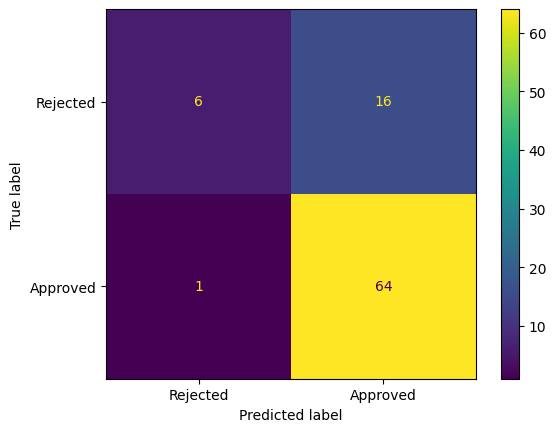

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Rejected", "Approved"])
disp.plot()
plt.show()

# How might we improve model performance?

* Further preprocessing:
	- Log transformations for skewed distributions.
	- Scale feature values.
	- Remove outliers e.g., high earners.
* Try a different model
* Gather more data.
	- Train new models on incorrect predictions (may need more data and/or a holdout set).
* Further feature engineering.
* Hyperparameter tuning.